<a href="https://www.kaggle.com/code/mounirelhady/dv-car-price-prediction?scriptVersionId=155399059" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv


# Import libraries 
**add libraries that we will use in our project**

In [2]:
# Adding the libraries
import numpy as np 
import openpyxl
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import os


# Import dataset 
**Import the CSV file (dataset) that we will work on it**

In [3]:
# importing the dataset 
car_df = pd.read_csv('/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv')
car_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


# DATA CLEANING 

To start the clean of data you should remove the duplicated data.To see if there is duplication in the data we will use duplicated() method

In [4]:
car_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19232    False
19233    False
19234    False
19235    False
19236    False
Length: 19237, dtype: bool

we can't see all data and understand if there duplication or not so we can count and get the number of duplicated data

In [5]:
car_df.duplicated().sum()


313

we foud alot of data dduplicated so we should remove it using drop_duplicates()

In [6]:
#inplce you found duplicata drop data
car_df.drop_duplicates(inplace=True)

In [7]:
#check after drop
car_df.duplicated().sum()


0

In [8]:
#see number of cloumn and rows after drop
car_df.shape

(18924, 18)

# deals with Missing Values
How many missing data points do we have?


In [9]:
# get the number of missing data points per column
missing_values = car_df.isnull().sum()
# look at the # of missing points
missing_values


ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

there is no missing value .to make sure we can see the what percentage of the values in our dataset were missing to giveus a better sense of the scale of this problem:

In [10]:
total_cells = np.product(car_df.shape)
total_missing = missing_values.sum()
percent_missing = (total_missing/total_cells) * 100
print(round(percent_missing),"%")

0 %


# If there is a missing value what should we do?
1-we can remove any rows or columns that contain missing values using dropna() method
2-we can fill in the missing values
   a)we can specify what we want the NaN values to be replaced with. we are going to replace all the
        NaN values with 0.
        ****fill_missing = car_df.fillna(0)
        
   b) replace missing values with whatever value comes directly after it in the same column.
        ****fill_missing = car_df.fillna(method='bfill', axis=0
 
 
  c)replace missing values with whatever value comes directly after it in the same column.,
        ****fill_missing = car_df.fillna(method='bfill', axis=0)

 # histogram
 

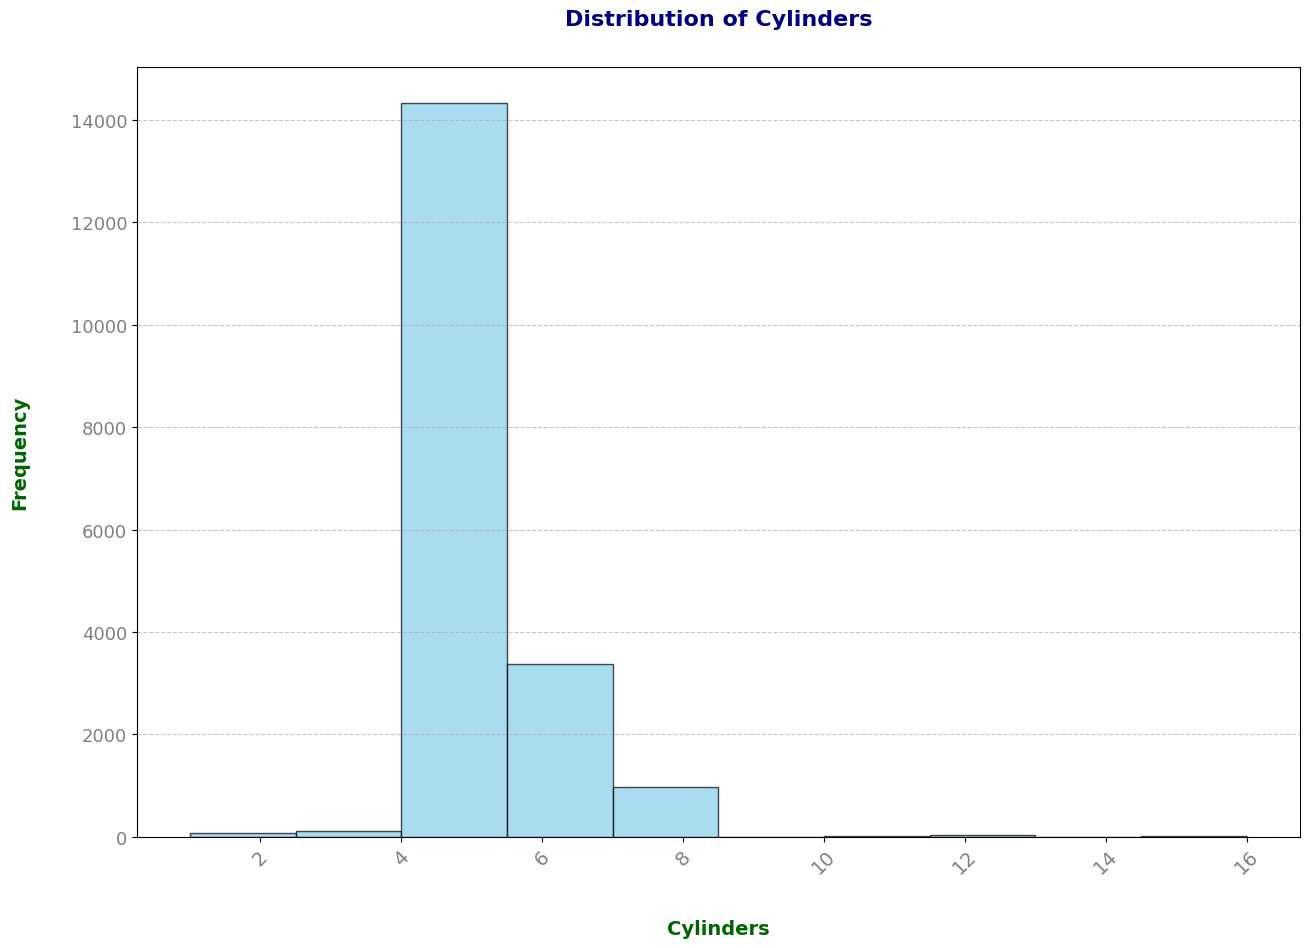

In [11]:
plt.figure(figsize=(15, 10))

plt.hist(car_df['Cylinders'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Cylinders', fontsize=16, fontweight='bold', color='navy', pad=30)
plt.xlabel('Cylinders', fontsize=14, fontweight='bold', color='darkgreen', labelpad=30)
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='darkgreen', labelpad=30)

plt.xticks(fontsize=14, color='gray', rotation=45)
plt.yticks(fontsize=13, color='gray')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

maxmum number of cars havefrom(4to5)cylinders

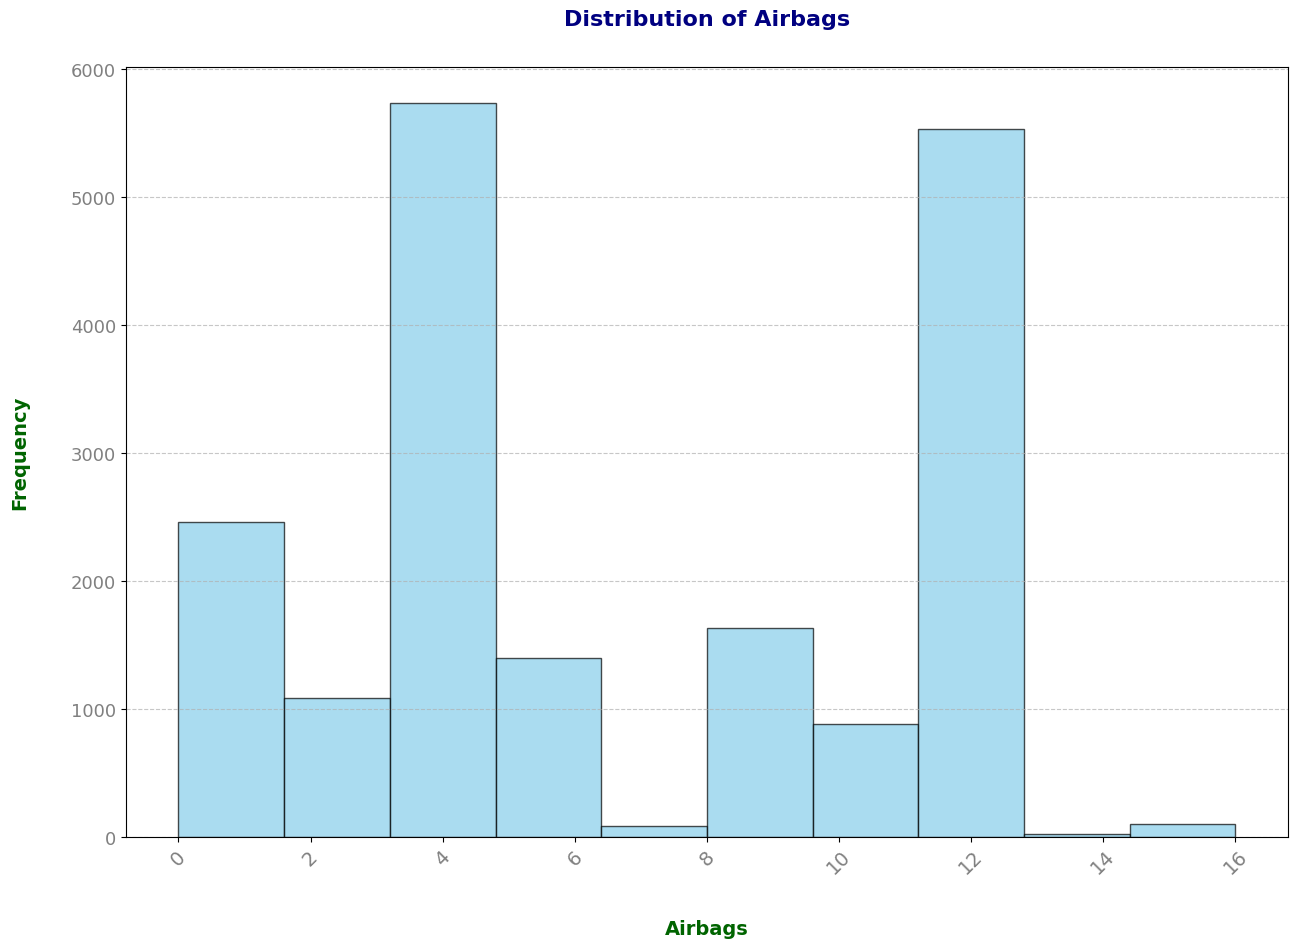

In [12]:
plt.figure(figsize=(15, 10))

plt.hist(car_df['Airbags'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Airbags', fontsize=16, fontweight='bold', color='navy', pad=30)
plt.xlabel('Airbags', fontsize=14, fontweight='bold', color='darkgreen', labelpad=30)
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='darkgreen', labelpad=30)

plt.xticks(fontsize=14, color='gray', rotation=45)
plt.yticks(fontsize=13, color='gray')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [13]:
import datetime
dtime=datetime.datetime.now()
car_df['Age']=dtime.year-car_df['Prod. year']

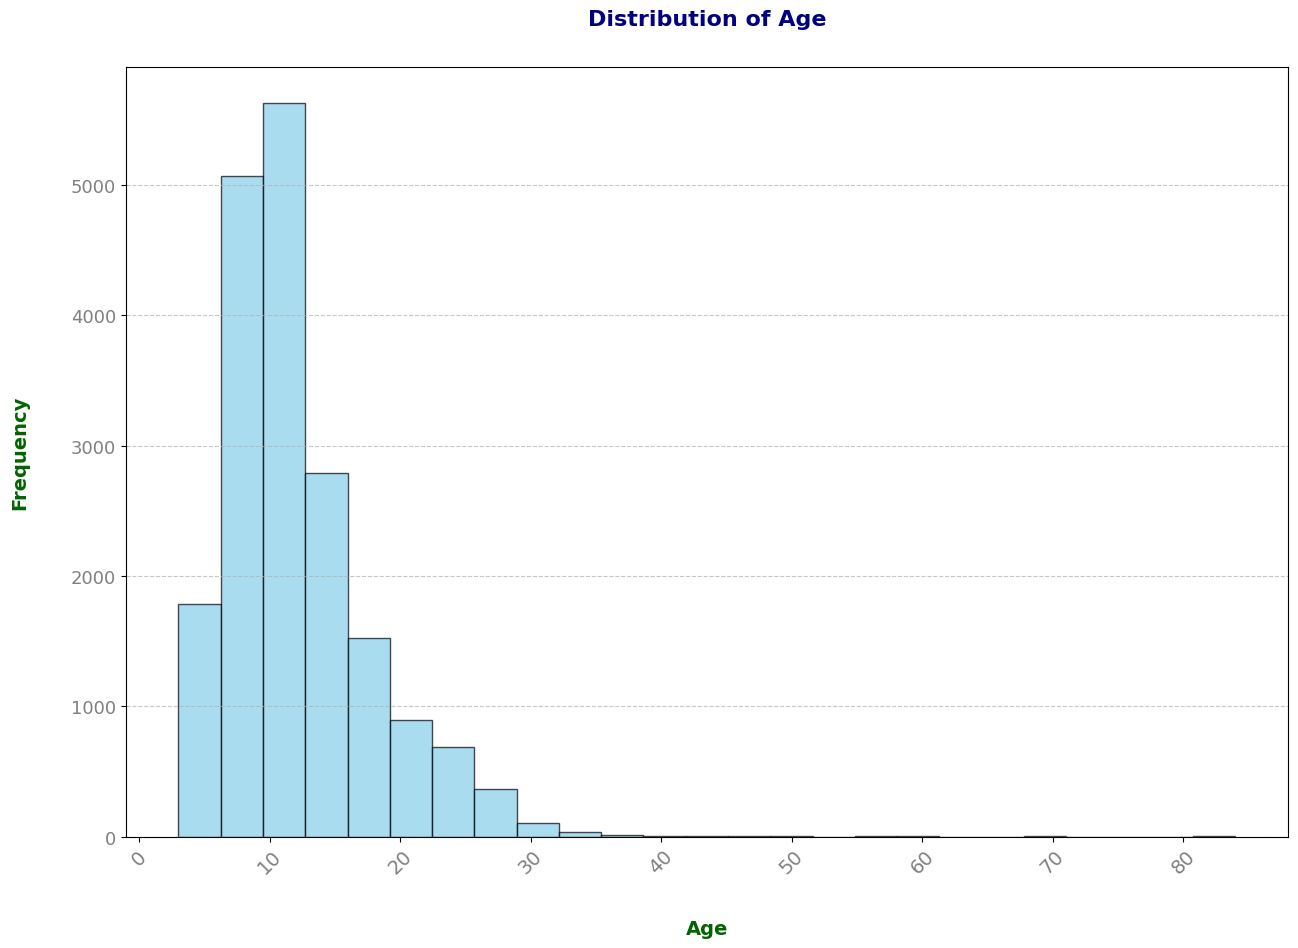

In [14]:
plt.figure(figsize=(15, 10))

plt.hist(car_df['Age'], bins=25, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Age', fontsize=16, fontweight='bold', color='navy', pad=30)
plt.xlabel('Age', fontsize=14, fontweight='bold', color='darkgreen', labelpad=30)
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='darkgreen', labelpad=30)

plt.xticks(fontsize=14, color='gray', rotation=45)
plt.yticks(fontsize=13, color='gray')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

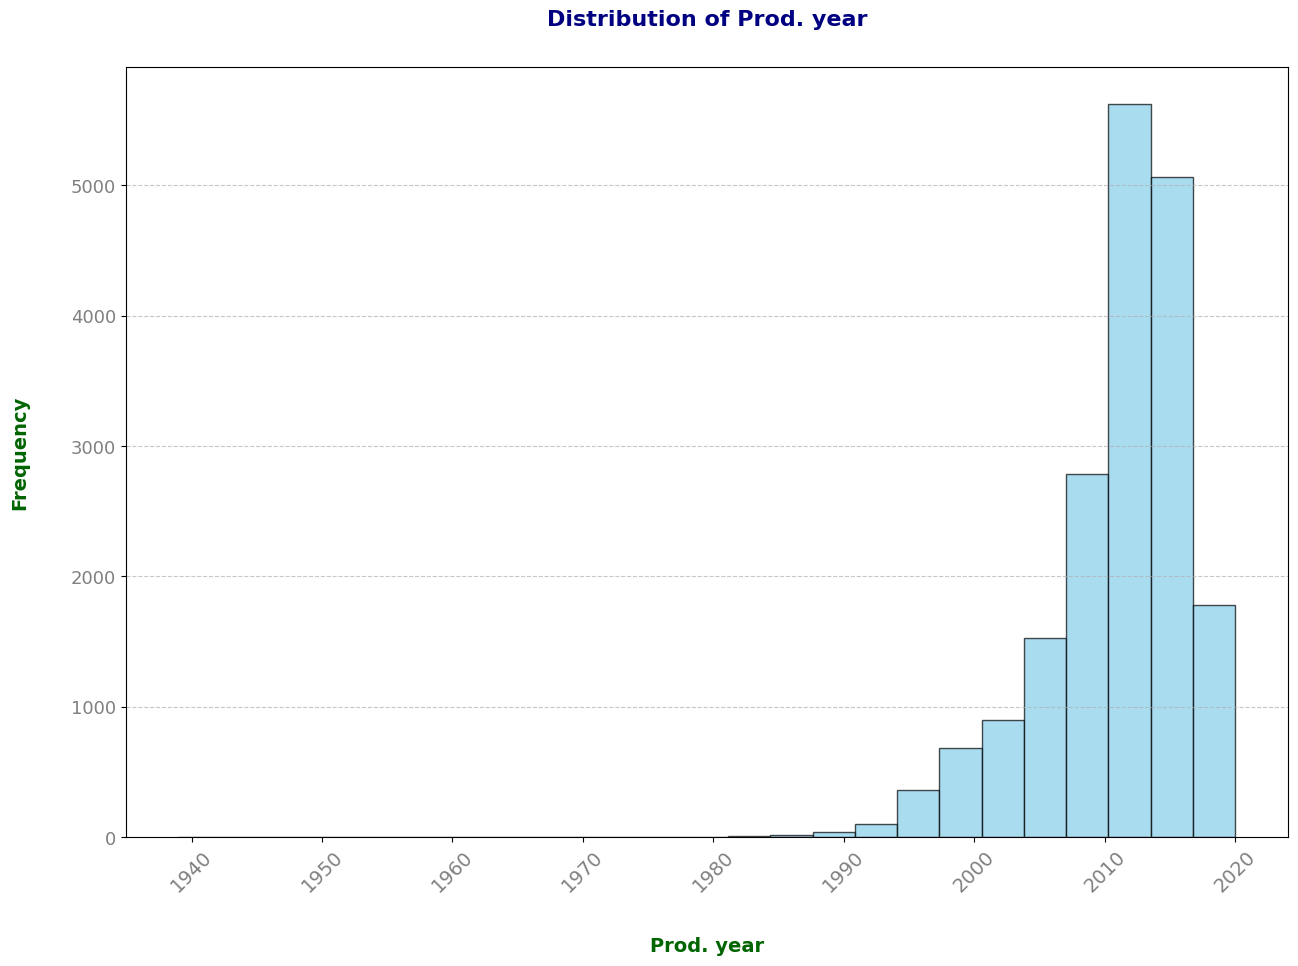

In [15]:
plt.figure(figsize=(15, 10))

plt.hist(car_df['Prod. year'], bins=25, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Prod. year', fontsize=16, fontweight='bold', color='navy', pad=30)
plt.xlabel('Prod. year', fontsize=14, fontweight='bold', color='darkgreen', labelpad=30)
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='darkgreen', labelpad=30)

plt.xticks(fontsize=14, color='gray', rotation=45)
plt.yticks(fontsize=13, color='gray')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

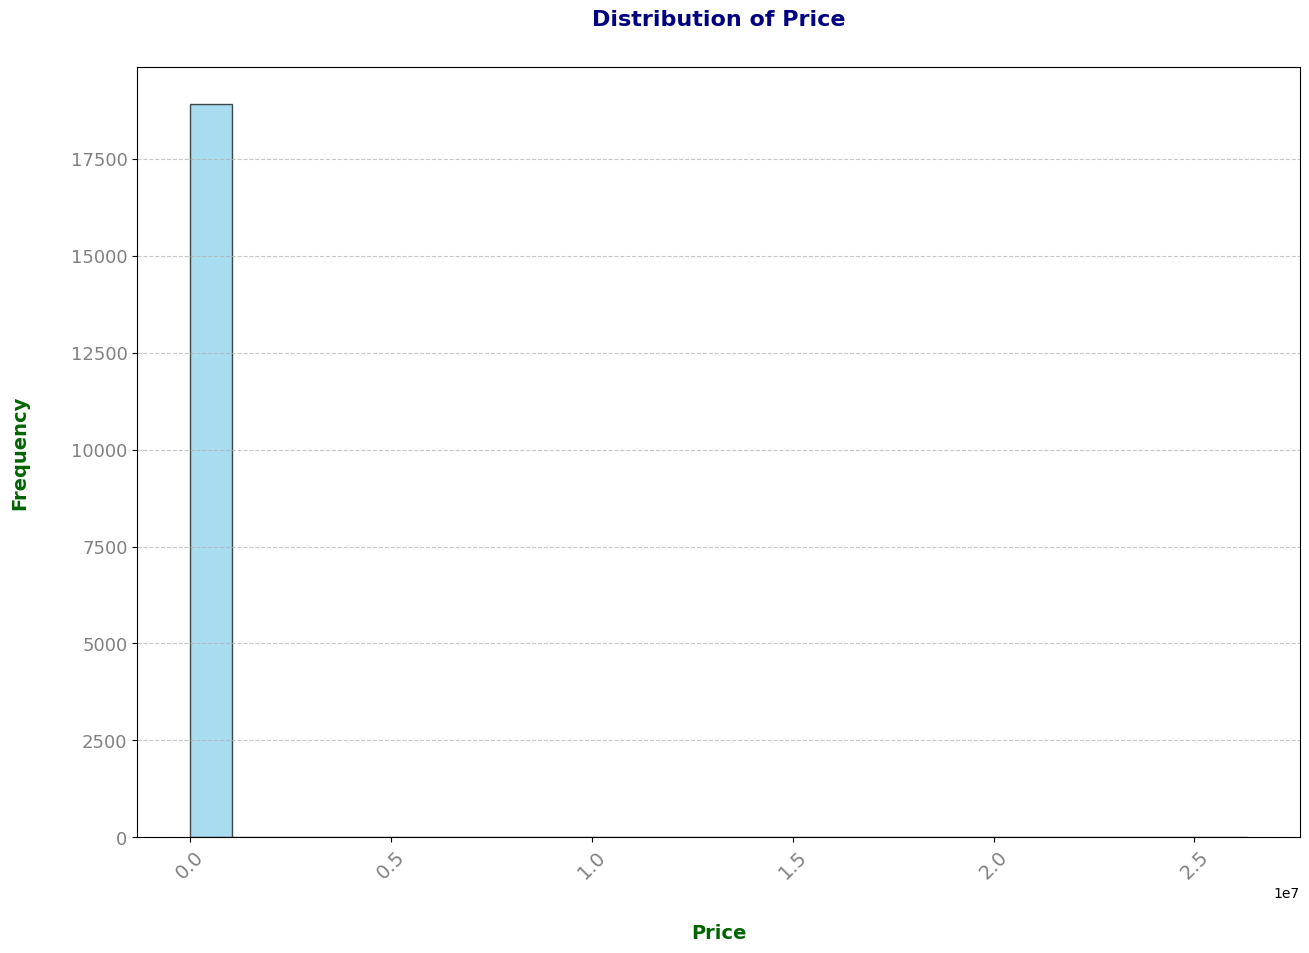

In [16]:
plt.figure(figsize=(15, 10))

plt.hist(car_df['Price'], bins=25, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Price', fontsize=16, fontweight='bold', color='navy', pad=30)
plt.xlabel('Price', fontsize=14, fontweight='bold', color='darkgreen', labelpad=30)
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='darkgreen', labelpad=30)

plt.xticks(fontsize=14, color='gray', rotation=45)
plt.yticks(fontsize=13, color='gray')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()